In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm, preprocessing

In [9]:
import numbers
from sklearn.utils import check_array, check_random_state
from sklearn.utils import shuffle as shuffle_

def make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.0,
               center_box=(-10.0, 10.0), shuffle=True, random_state=None):
    generator = check_random_state(random_state)

    if isinstance(centers, numbers.Integral):
        centers = generator.uniform(center_box[0], center_box[1],
                                    size=(centers, n_features))
    else:
        centers = check_array(centers)
        n_features = centers.shape[1]

    if isinstance(cluster_std, numbers.Real):
        cluster_std = np.ones(len(centers)) * cluster_std

    X = []
    y = []

    n_centers = centers.shape[0]
    if isinstance(n_samples, numbers.Integral):
        n_samples_per_center = [int(n_samples // n_centers)] * n_centers
        for i in range(n_samples % n_centers):
            n_samples_per_center[i] += 1
    else:
        n_samples_per_center = n_samples

    for i, (n, std) in enumerate(zip(n_samples_per_center, cluster_std)):
        X.append(centers[i] + generator.normal(scale=std,
                                               size=(n, n_features)))
        y += [i] * n

    X = np.concatenate(X)
    y = np.array(y)

    if shuffle:
        X, y = shuffle_(X, y, random_state=generator)

    return X, y

In [21]:
X, y = make_blobs(centers=4, random_state=8)
X = preprocessing.minmax_scale(X)
y = y % 2

In [22]:
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [23]:
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 1)
yy = a * xx - clf.intercept_[0] / w[1]

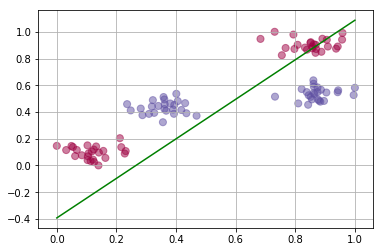

In [24]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=50, alpha=.5, cmap=plt.cm.Spectral)
plt.plot(xx, yy, color='green')
plt.grid()